# Machine Learning Assignment 

## Geely Auto pricing evaluation

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

### Business Goal 

- Ned to model the price of cars with the available independent variables. 
- To understand how exactly the prices vary with the independent variables. 
- Managment want to manipulate the design of the cars, the business strategy etc. to meet price levels. 
- Model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
# Basic
import pandas as pd
import numpy as np

# To visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# To make better visual of dataframe
pd.set_option('display.max_columns',70)
pd.set_option('display.max_rows',70)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\soniv\\Assignment'

## Step:1 Data Understanding

In [4]:
# Read data
carprice = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
# Data looks as below
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Data having 205 rows and 26 columns
carprice.shape

(205, 26)

In [7]:
# All columns are non null means not having NA 
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
# How numerical values looks
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# To undrestand categorical variables available in dataset 
# car_ID is unique in our data set and it will not help in our analysis
carprice.nunique().sort_values()

fueltype              2
aspiration            2
doornumber            2
enginelocation        2
drivewheel            3
carbody               5
symboling             6
enginetype            7
cylindernumber        7
fuelsystem            8
peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
CarName             147
curbweight          171
price               189
car_ID              205
dtype: int64

In [10]:
carprice.price.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
5%        6197.000000
10%       6657.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
95%      32472.400000
max      45400.000000
Name: price, dtype: float64

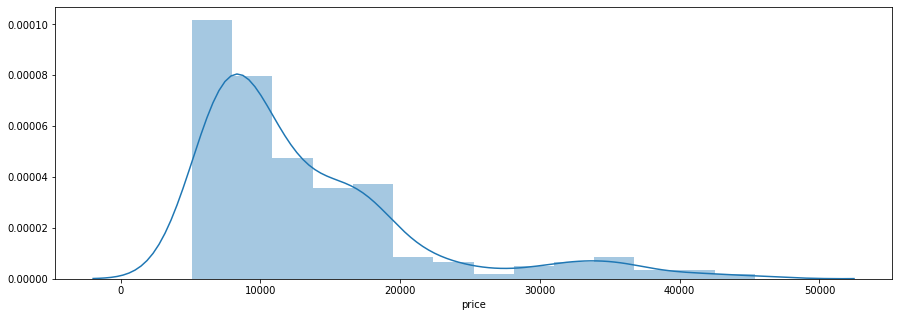

In [11]:
# Distribution of price
plt.figure(figsize=(15, 5))
sns.distplot(carprice['price'], hist_kws={'log':False})
#plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [12]:
carprice = carprice.drop('car_ID',axis =1)

#### Undestood catergorical variables
fueltype,aspiration, doornumber, enginelocation, drivewheel, carbody, symboling, enginetype, cylindernumber, fuelsystem

## Step 2: Visualising data

Visualise numeric variables wit pairplot function

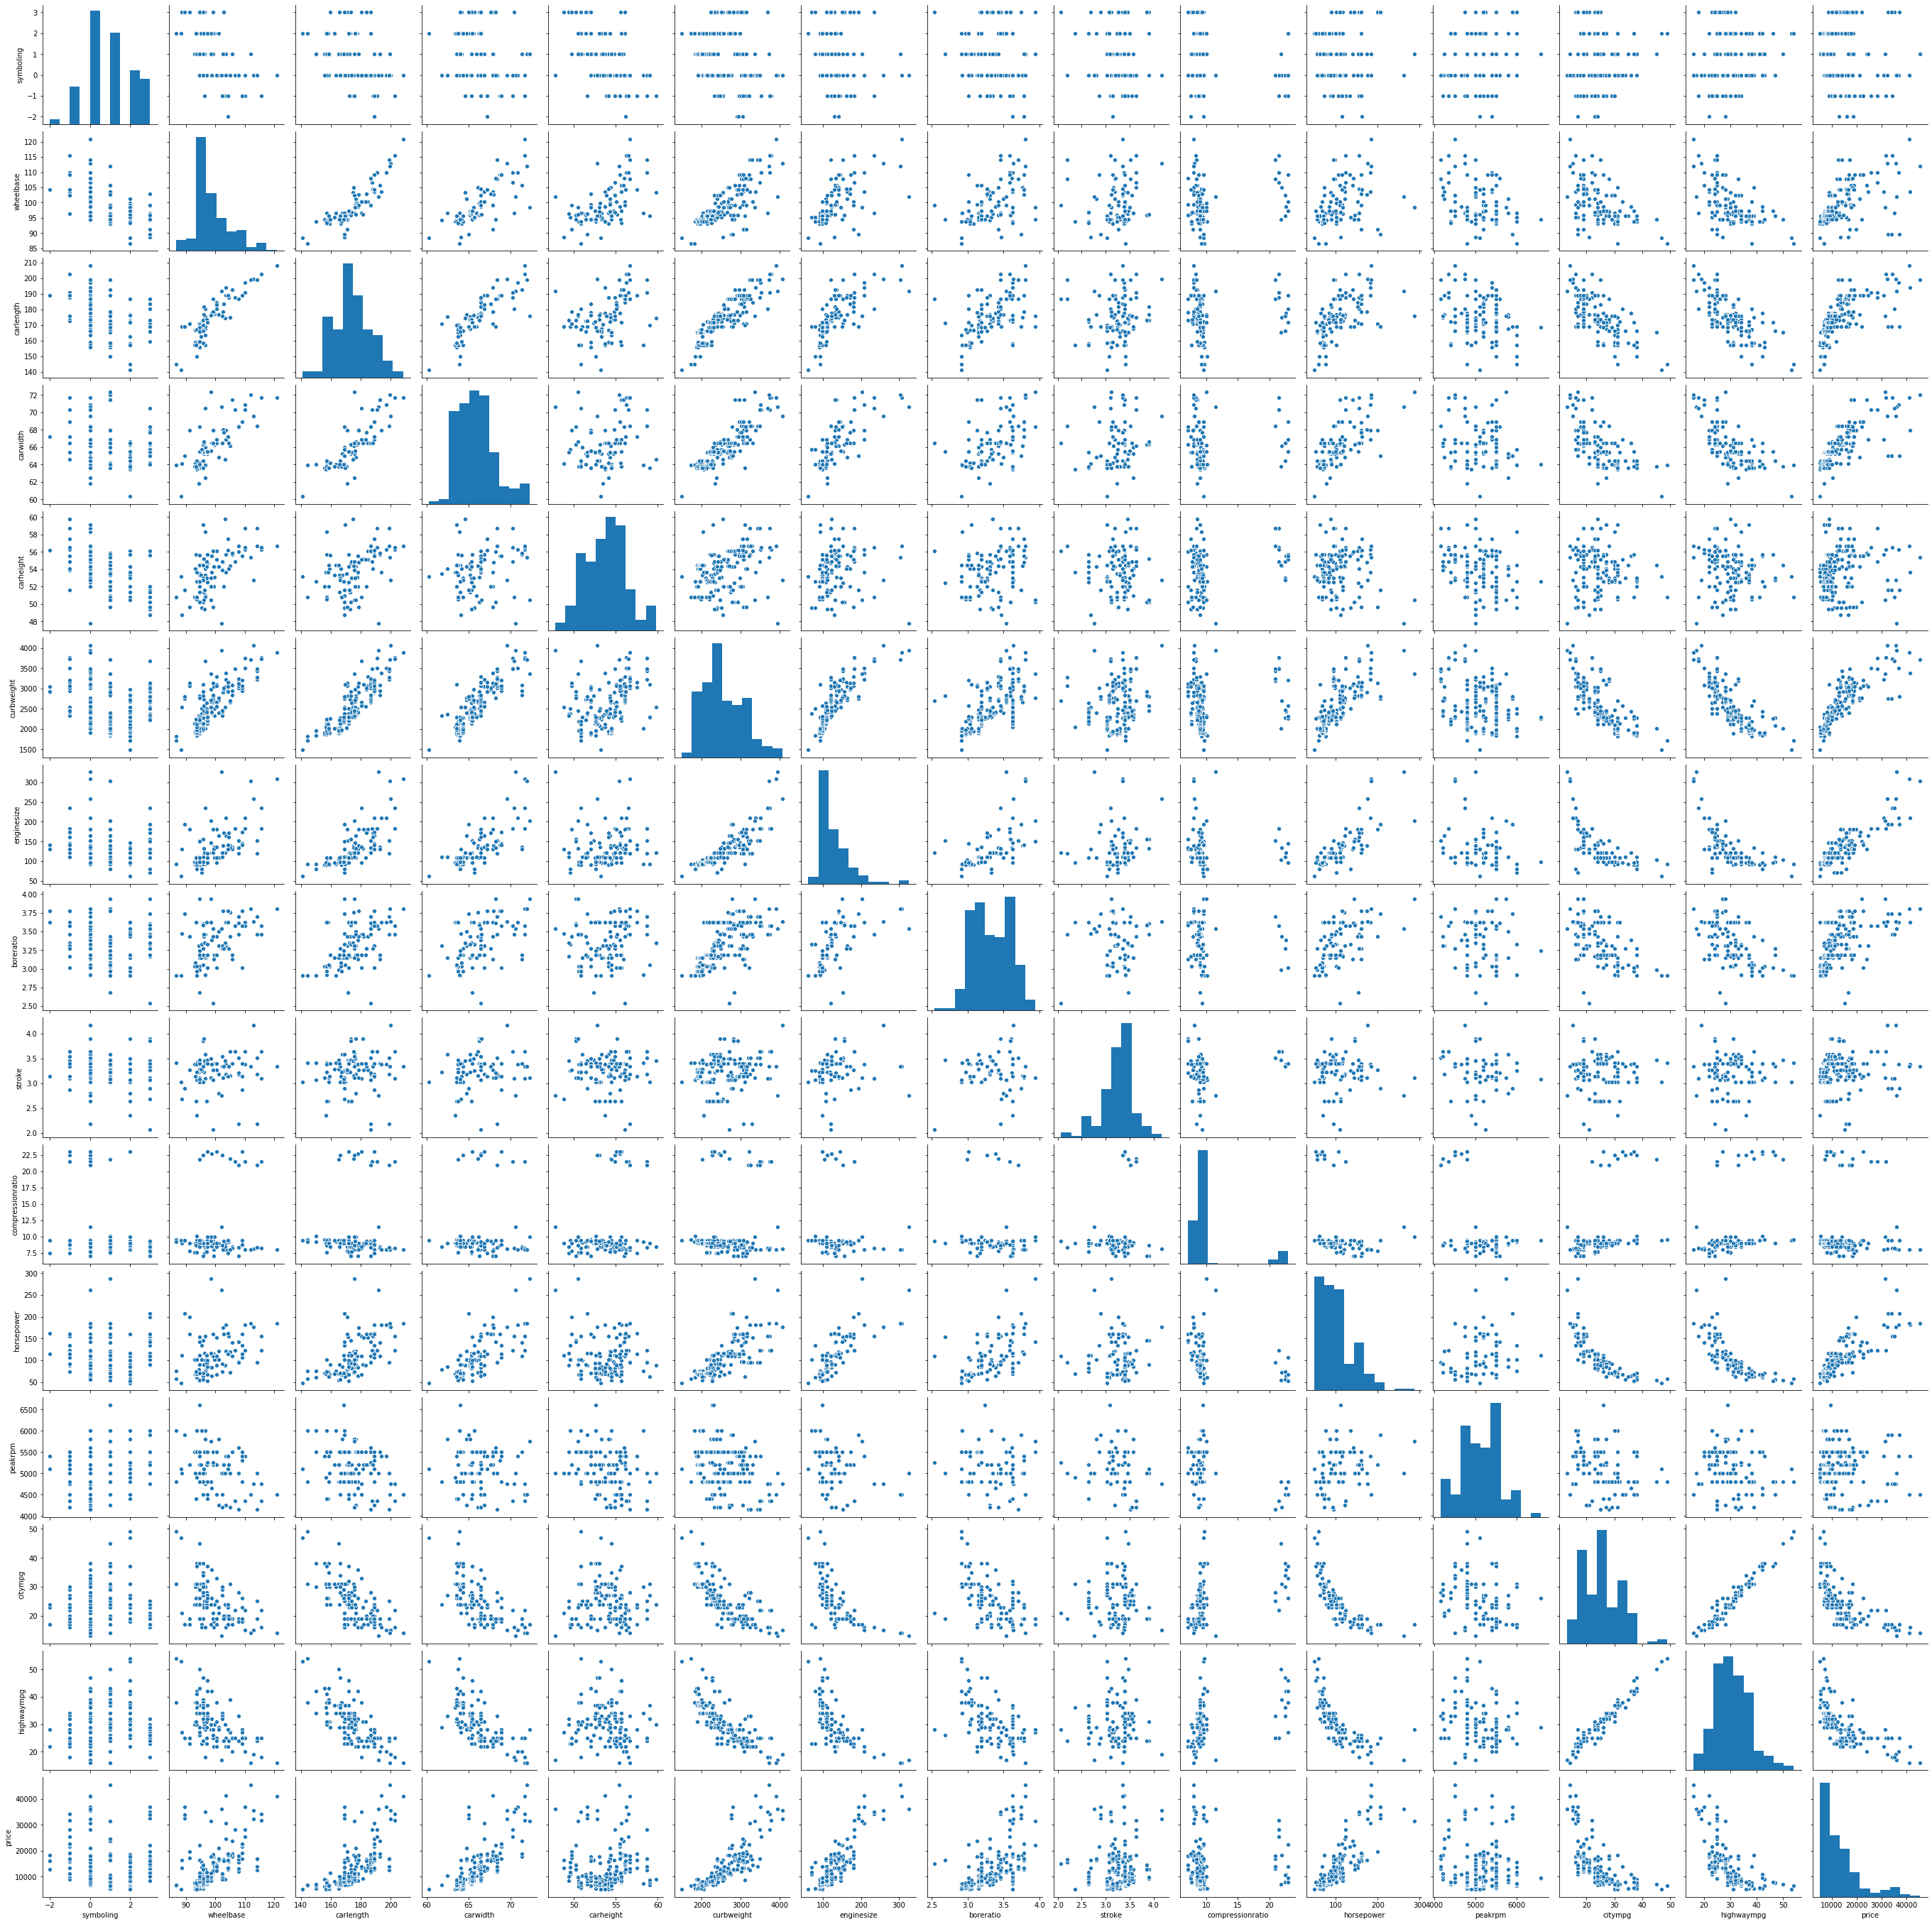

In [13]:
sns.pairplot(carprice)
plt.show()

Visualise Categorical variables

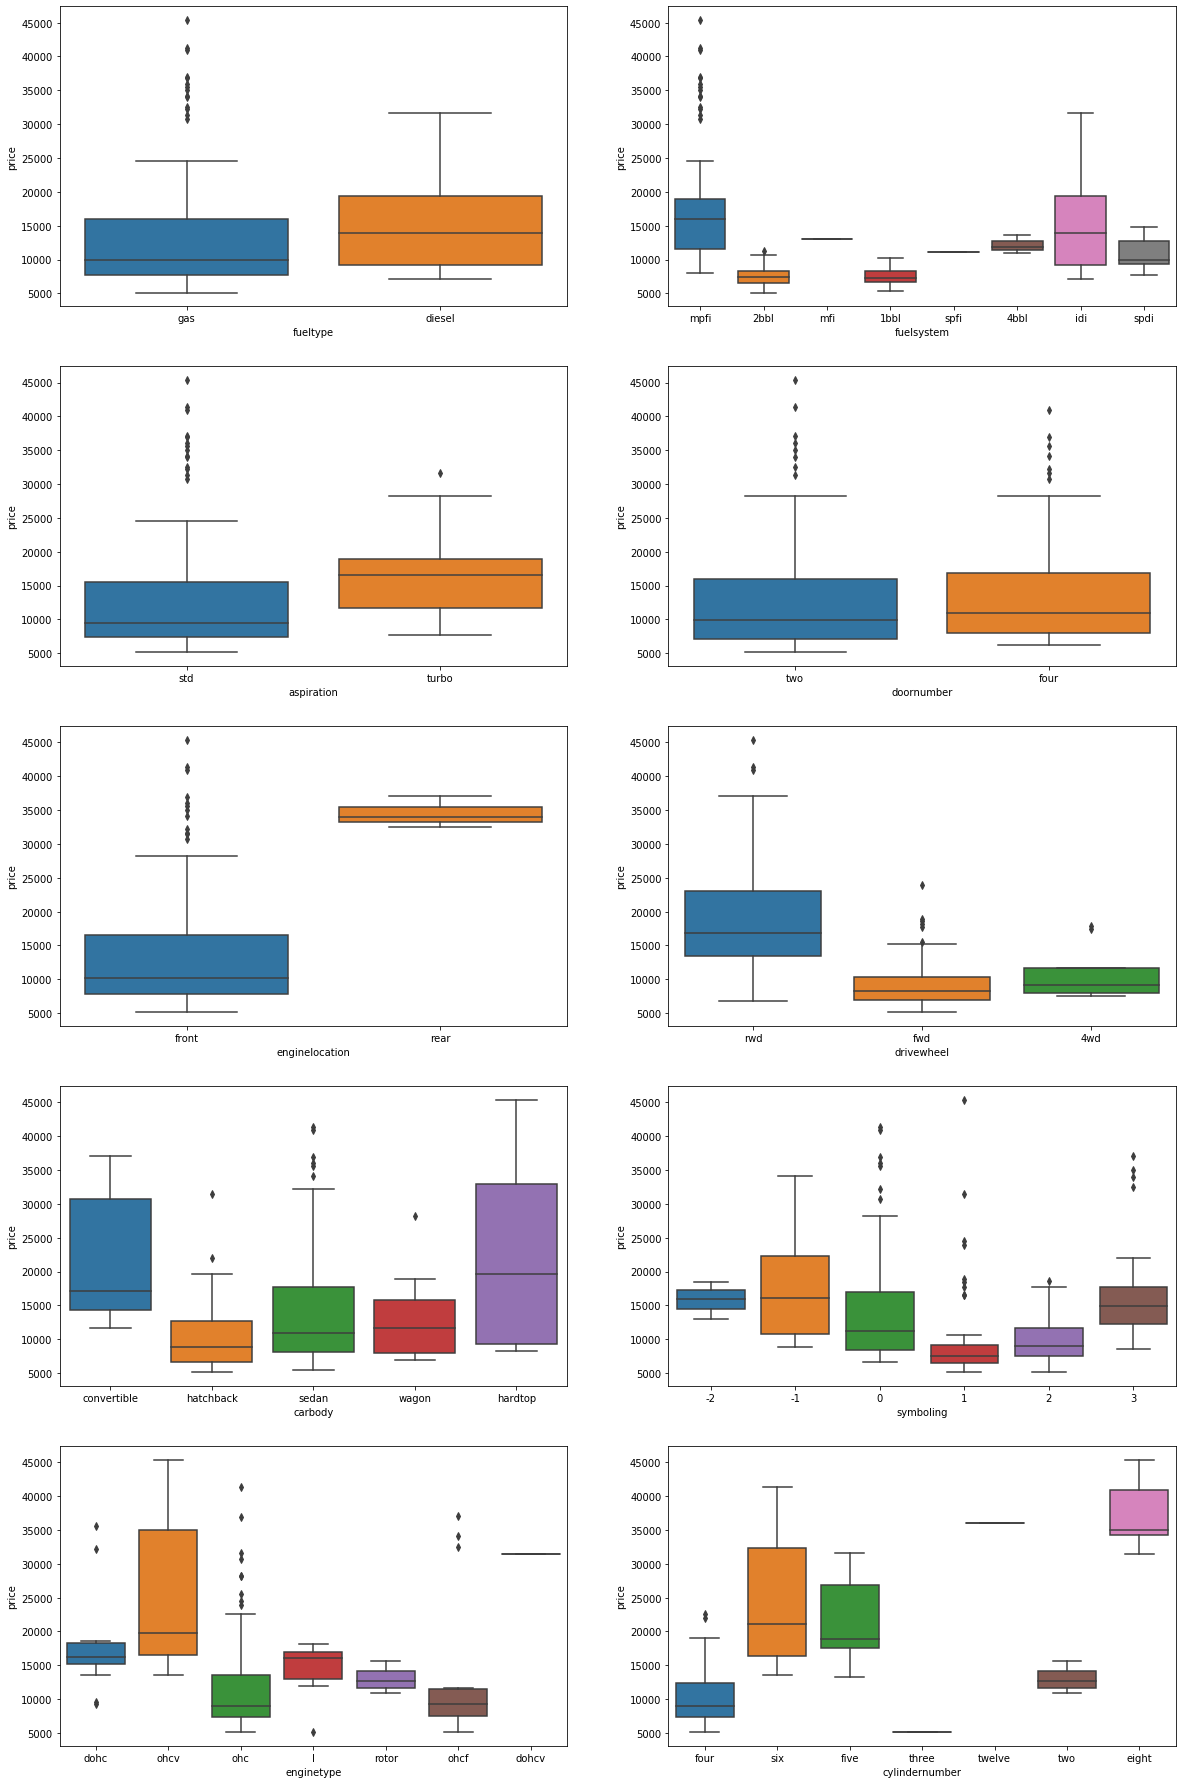

In [14]:
 
plt.figure(figsize=(20, 32))
plt.subplot(5,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(5,2,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(5,2,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(5,2,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(5,2,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(5,2,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(5,2,7)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(5,2,8)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(5,2,9)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(5,2,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.show()

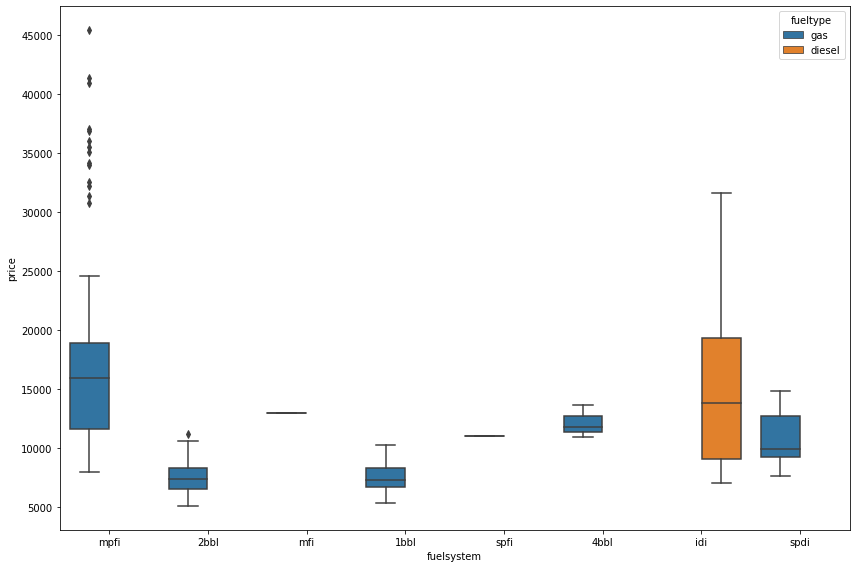

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = carprice)
plt.tight_layout()

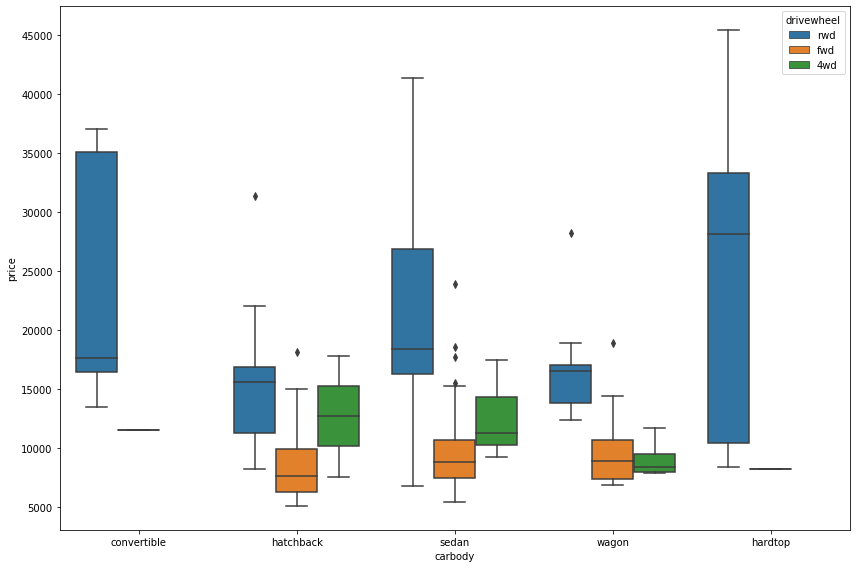

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'carbody', y = 'price', hue = 'drivewheel', data = carprice)
plt.tight_layout()

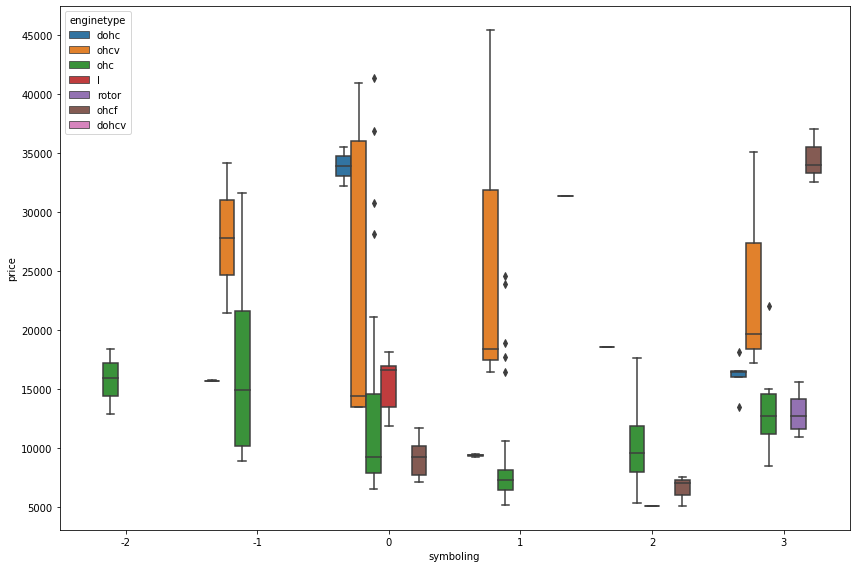

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'symboling', y = 'price', hue = 'enginetype', data = carprice)
plt.tight_layout()

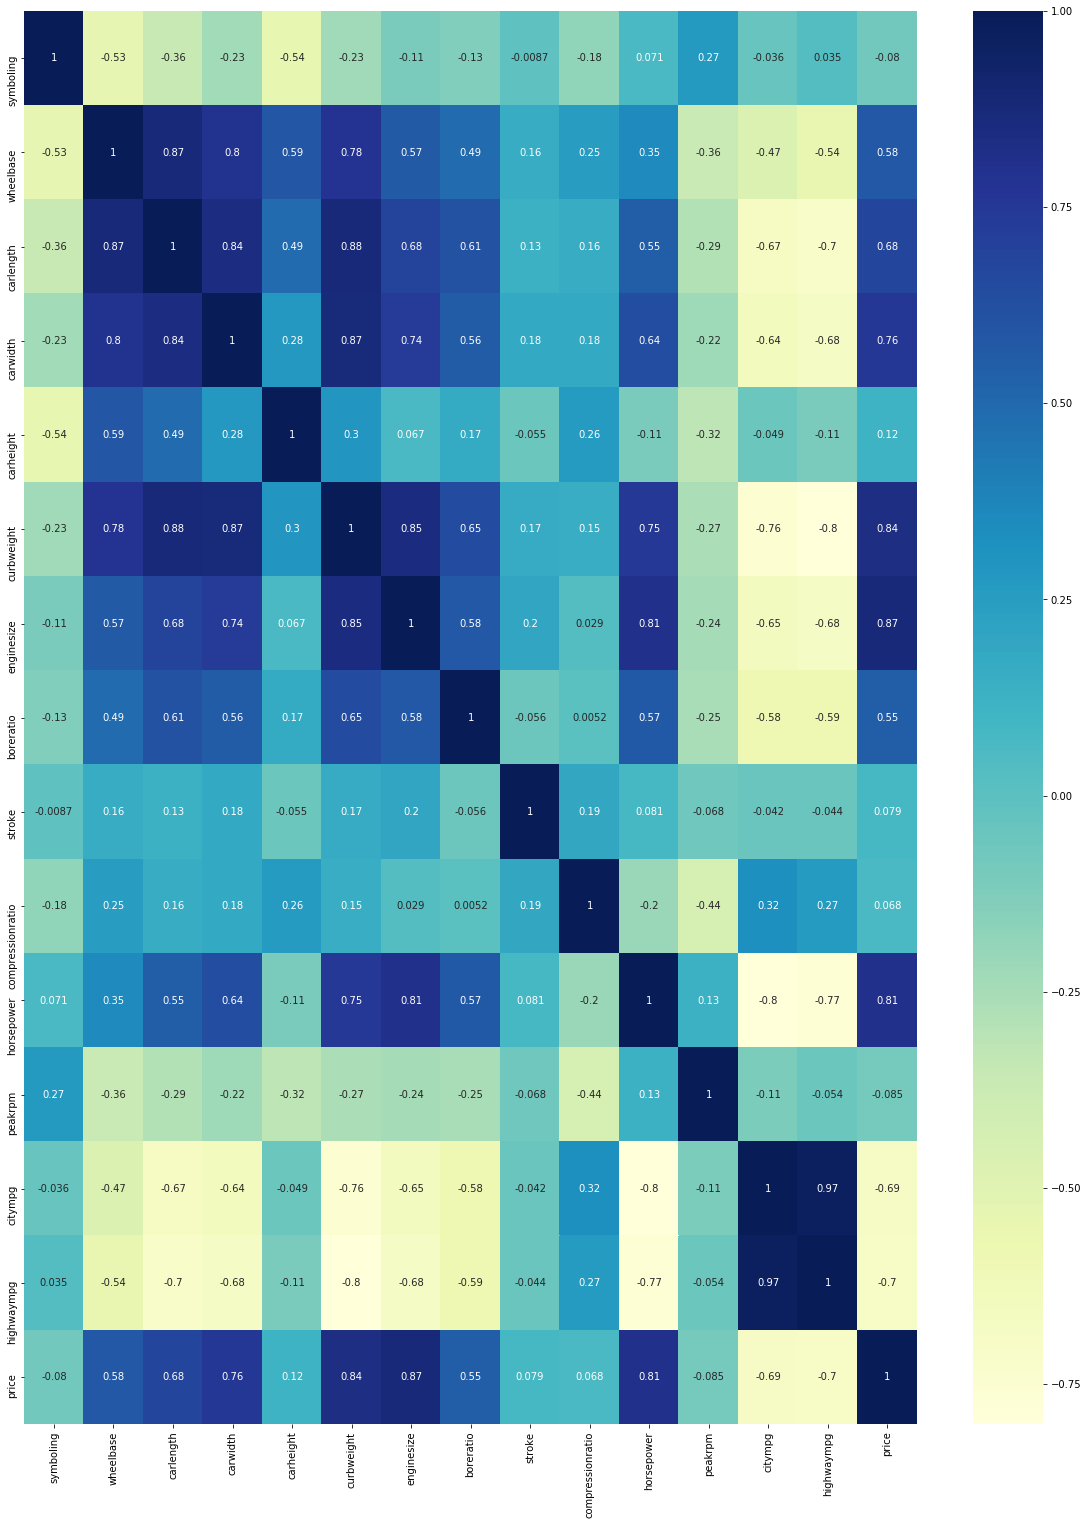

In [18]:
# To check correlation brodly
plt.figure(figsize = (20, 26))
sns.heatmap(carprice.corr(), cmap="YlGnBu", annot = True)
plt.show()

Price is main variable in our analysis

- Price is negatively correlated with symboling, peakrpm, citympg and highwaympg.
- Price has a very low correlation with carheight, stroke and compressionratio.
- Price shows a decent correlation with wheelbase, carlength, boreratio.
- Price is highly correlated to carwidth, crubweight, enginesize and horsepower.

## Step 3: Data Cleaning and Data prepration

In [19]:
# Checking of dupticate rows in our dataset
carprice=carprice.drop_duplicates()

In [20]:
# As we have 0 in our data frame we have to impute
0 in carprice.price

True

In [21]:
# From below analysis we found no zero in our price column which is good 
carprice.price.value_counts()

5572.0     2
6692.0     2
7957.0     2
7898.0     2
6229.0     2
          ..
6377.0     1
30760.0    1
16925.0    1
15998.0    1
18920.0    1
Name: price, Length: 189, dtype: int64

In [22]:
# Make a backup for carprice not to start kernel again and again
CarPrice = carprice

In [23]:
# We need to compare brands as Geely is itself a brand so we will remove brand name and make a derived column
CarPrice['CarBrand']=CarPrice['CarName'].str.split().str[0]
CarPrice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [24]:
CarPrice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [25]:
CarPrice.CarBrand.value_counts().sort_index(ascending = False)

vw              2
volvo          11
volkswagen      9
vokswagen       1
toyouta         1
toyota         31
subaru         12
saab            6
renault         2
porsche         4
porcshce        1
plymouth        7
peugeot        11
nissan         17
mitsubishi     13
mercury         1
mazda          15
maxda           2
jaguar          3
isuzu           4
honda          13
dodge           9
chevrolet       3
buick           8
bmw             8
audi            7
alfa-romero     3
Nissan          1
Name: CarBrand, dtype: int64

In [26]:
# To make all cases similar
CarPrice.CarBrand = CarPrice.CarBrand.str.lower()

In [27]:
# While looking into data set found car brand having spelling mistakes need to correct
#CarPrice.loc[(CarPrice.CarBrand=='vw') | (CarPrice.CarBrand=='vokswagen') ,'CarBrand'] ='volkswagen'
#CarPrice.loc[(CarPrice.CarBrand=='toyouta') ,'CarBrand'] ='toyota'
#CarPrice.loc[(CarPrice.CarBrand=='porcshce') ,'CarBrand'] ='porsche'
#CarPrice.loc[(CarPrice.CarBrand=='maxda') ,'CarBrand'] ='mazda'

CarPrice.CarBrand=CarPrice.CarBrand.str.replace('vw','volkswagen')
CarPrice.CarBrand=CarPrice.CarBrand.str.replace('vokswagen','volkswagen')
CarPrice.CarBrand=CarPrice.CarBrand.str.replace('toyouta','toyota')
CarPrice.CarBrand=CarPrice.CarBrand.str.replace('porcshce ','porsche')
CarPrice.CarBrand=CarPrice.CarBrand.str.replace('maxda','mazda')

In [28]:
CarPrice.CarBrand.value_counts().sort_index(ascending = False)

volvo          11
volkswagen     12
toyota         32
subaru         12
saab            6
renault         2
porsche         4
porcshce        1
plymouth        7
peugeot        11
nissan         18
mitsubishi     13
mercury         1
mazda          17
jaguar          3
isuzu           4
honda          13
dodge           9
chevrolet       3
buick           8
bmw             8
audi            7
alfa-romero     3
Name: CarBrand, dtype: int64

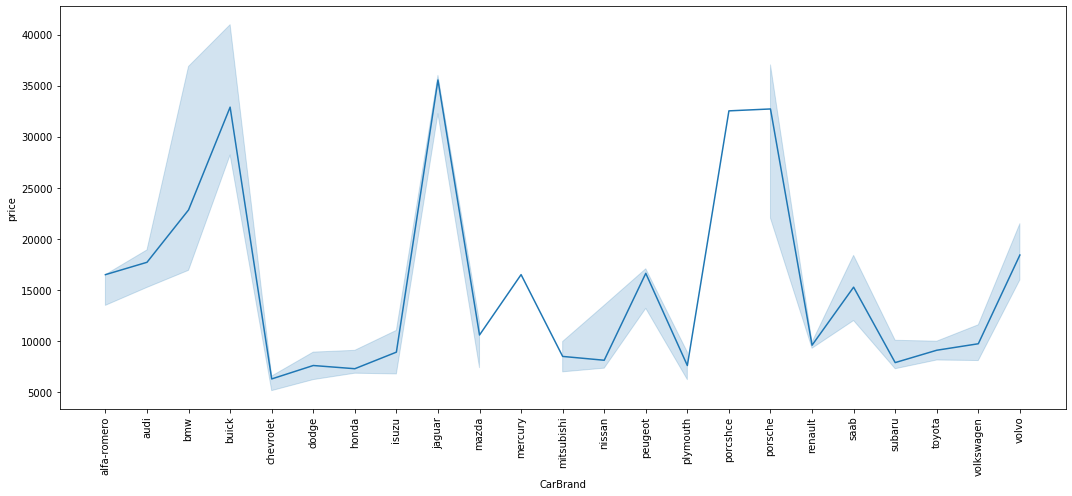

In [29]:
# As per brand prices 
plt.figure(figsize=(15, 7))
sns.lineplot(x='CarBrand', y='price', data=carprice, estimator=np.median)
plt.xticks(rotation=90)
plt.tight_layout()

## Step 4: Dealing with categorical variable

### Automobile observations:

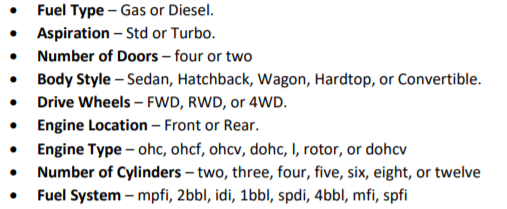

In [30]:
CarPrice.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [31]:
CarPrice.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [32]:
CarPrice.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [33]:
CarPrice.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [34]:
CarPrice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [35]:
CarPrice.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [36]:
CarPrice.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [37]:
CarPrice.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
CarPrice['cylindernumber']=le.fit_transform(CarPrice['cylindernumber'])

In [38]:
CarPrice.loc[(CarPrice.doornumber=='two') ,'doornumber'] = 2
CarPrice.loc[(CarPrice.doornumber=='four') ,'doornumber'] = 4



CarPrice.loc[(CarPrice.cylindernumber=='two') ,'cylindernumber'] = 2
CarPrice.loc[(CarPrice.cylindernumber=='three') ,'cylindernumber'] = 3
CarPrice.loc[(CarPrice.cylindernumber=='four') ,'cylindernumber'] = 4
CarPrice.loc[(CarPrice.cylindernumber=='five') ,'cylindernumber'] = 5
CarPrice.loc[(CarPrice.cylindernumber=='six') ,'cylindernumber'] = 6
CarPrice.loc[(CarPrice.cylindernumber=='eight') ,'cylindernumber'] = 8
CarPrice.loc[(CarPrice.cylindernumber=='twelve') ,'cylindernumber'] = 12

In [39]:
#Creating Dummy variables

fueltype = pd.get_dummies(CarPrice['fueltype'], drop_first = True)
aspiration = pd.get_dummies(CarPrice['aspiration'], drop_first = True)
carbody = pd.get_dummies(CarPrice['carbody'], drop_first = True)
drivewheel = pd.get_dummies(CarPrice['drivewheel'], drop_first = True)
enginelocation = pd.get_dummies(CarPrice['enginelocation'], drop_first = True)
enginetype = pd.get_dummies(CarPrice['enginetype'], drop_first = True)
fuelsystem = pd.get_dummies(CarPrice['fuelsystem'], drop_first = True)
CarBrand = pd.get_dummies(CarPrice['CarBrand'], drop_first = True)

In [40]:
CarPrice = pd.concat([CarPrice,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarBrand],axis=1)

In [41]:
CarPrice.cylindernumber.value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [42]:
CarPrice

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
CarPrice.shape

(205, 70)

In [44]:
# Now remove old columns 
CarPrice = CarPrice.drop(['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','CarBrand'],axis = 1)

In [45]:
CarPrice.shape

(205, 62)

In [46]:
CarPrice=CarPrice.drop(['CarName'],axis=1)

def tier_seg(val):
    if val<10000:
        return "economic_car"
    if (val>=10000) & (val<=20000):
        return "midtier_car"
    if val>=30000:
        return "luxery_car"
    
CarPrice["carsegment"] = CarPrice.price.apply(tier_seg)
CarPrice = pd.DataFrame(CarPrice)
print(CarPrice.head())

In [47]:
## Decided to segment cars to understand which category is good to enter in market,
CarPrice["carsegment"] = pd.cut(CarPrice['price'],[0,10000,20000,100000],labels=['economic','mid','luxury'])

In [48]:
CarPrice.head()


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,volkswagen,volvo,carsegment
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mid
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mid
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mid
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mid
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mid


In [49]:
carsegment = pd.get_dummies(CarPrice['carsegment'], drop_first = True)

In [50]:
CarPrice = pd.concat([CarPrice,carsegment],axis=1)
#Below columns are not useful and already we derived columns from these columns
CarPrice=CarPrice.drop(['carsegment','audi','bmw','buick','chevrolet','dodge','honda','isuzu','jaguar','mazda','mercury','mitsubishi','nissan','peugeot','plymouth','porcshce','porsche','renault','saab','subaru','toyota','volkswagen','volvo'],axis=1)

In [51]:
CarPrice.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,mid,luxury
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## Step 5: Splitting the data set into traning and test data set

In [52]:
import sklearn
from sklearn.model_selection import train_test_split
# Took 80:20 split as dataset is small in previous sessions we got info for small data set split 80:20 is better than 70:30
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice, train_size = 0.8, test_size = 0.2, random_state = 100)

## Step 6: Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber', 'cylindernumber', 'price']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [54]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,mid,luxury
3,0.965645,0.873751,0.256524,0.290980,0.205880,0.286269,-0.343330,-0.339966,-0.372828,-0.419206,0.450439,-0.060255,0.024240,0.785400,-0.254620,-0.183655,0.155046,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
157,-0.692635,0.873751,-0.460676,-0.558965,-0.630100,-0.322919,-0.781780,-0.339966,-0.652371,-0.419206,-0.770313,-0.305339,-0.791203,-0.704912,0.646625,0.825130,-0.725490,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
81,1.794784,-1.144491,-0.355720,-0.006088,-0.165667,-1.703744,-0.360637,-0.339966,-0.042458,0.205437,0.648399,-0.427882,-0.332517,-0.279109,-0.104413,0.104569,-0.555825,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
32,0.136505,-1.144491,-0.810530,-1.904025,-0.815873,-0.404144,-1.304842,-0.339966,-1.135218,-1.512333,-0.638340,-0.035746,-1.046029,0.785400,1.848286,1.545690,-0.960100,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99,-0.692635,0.873751,-0.198286,0.026919,-0.258553,0.448719,-0.368329,-0.339966,-0.093284,0.127357,0.681392,-0.427882,-0.103173,0.146694,0.196003,0.392793,-0.497140,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [55]:
y_train = df_train.pop('price')
X_train = df_train

## Step 7: Building a linear Model

### Preliminary Modeling to understand how model works, suggested during live session

In [56]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [57]:
lm= LinearRegression()

In [58]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(lm.coef_)

[ 4.88910934e-02  4.16511734e-03  3.07029501e-02  8.56464989e-02
  7.68688873e-02  1.05458095e-02  1.40063127e-01 -2.41878321e-01
  5.50885259e-01 -2.13698352e-01 -1.69264939e-01 -6.86071316e-01
  3.36199349e-01  7.81900329e-02  8.85740224e-02  7.79663911e-02
 -1.20300891e+00 -1.00206033e-01 -4.75271941e-01 -4.03764119e-01
 -3.38709075e-01 -3.83560394e-01 -7.43998342e-02  7.98524345e-03
  5.65376146e-01  3.58513039e-03  9.44599151e-02  3.20100512e-01
  2.57729809e-01 -9.94511135e-02  6.31942898e-01  1.00479884e-02
 -1.11741549e-02  1.20300891e+00 -4.10702070e-01 -4.58526794e-03
 -2.95515899e-01  1.11022302e-16  1.91975868e-01  1.21405474e+00]


In [60]:
print(lm.intercept_)

0.894659846874343


In [61]:
from sklearn.feature_selection import RFE

In [62]:
lm = LinearRegression()
rfe1=RFE(lm,15)

In [63]:
rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [64]:
print(rfe1.support_)
print(rfe1.ranking_)

[False False False False False False False  True  True  True False  True
  True False False False  True False  True False False False False False
  True False False False False  True  True False False  True  True False
  True False  True  True]
[17 24 18 14  7 20 11  1  1  1  2  1  1 13 16 12  1  8  1  4  5  6 15 22
  1 25  9  3 10  1  1 19 21  1  1 23  1 26  1  1]


## Model Building 

In [65]:
import statsmodels.api as sm

In [66]:
# Columns selected by rfe1
feature1=X_train.columns[rfe1.support_]
#Subsetting training data set
X_train_feature1=X_train[feature1]

In [67]:
# Adding constant to the model without constant error comes
X_train_feature1=sm.add_constant(X_train_feature1)
X_train_feature1.head()

,const,cylindernumber,enginesize,boreratio,compressionratio,horsepower,gas,hardtop,rear,ohcv,rotor,idi,mfi,spdi,mid,luxury
3,1.0,-0.339966,-0.372828,-0.419206,-0.060255,0.024240,1,0,0,0,0,0,0,0,1,0
157,1.0,-0.339966,-0.652371,-0.419206,-0.305339,-0.791203,1,0,0,0,0,0,0,0,0,0
81,1.0,-0.339966,-0.042458,0.205437,-0.427882,-0.332517,1,0,0,0,0,0,0,0,0,0
32,1.0,-0.339966,-1.135218,-1.512333,-0.035746,-1.046029,1,0,0,0,0,0,0,0,0,0
99,1.0,-0.339966,-0.093284,0.127357,-0.427882,-0.103173,1,0,0,0,0,0,0,0,0,0


In [68]:
# Fitting the model with top 15 features
lm1=sm.OLS(y_train,X_train_feature1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.60e-81
Time:                        20:24:35   Log-Likelihood:                -6.8342
No. Observations:                 164   AIC:                             43.67
Df Residuals:                     149   BIC:                             90.17
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3077      0.152  

In [69]:
#VIF to be imported 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF calculation
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)

In [70]:
vif

,features,VIF
6,gas,inf
11,idi,inf
4,compressionratio,66.95
2,enginesize,12.32
1,cylindernumber,11.98
5,horsepower,7.04
15,luxury,3.54
3,boreratio,2.80
14,mid,2.17
10,rotor,2.01


Variables with infinite constant are not of use need to drop them manually

In [71]:
X_train_feature1.drop(['gas','idi'],axis=1,inplace = True)

In [72]:
lm2=sm.OLS(y_train,X_train_feature1).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.48e-80
Time:                        20:24:35   Log-Likelihood:                -13.343
No. Observations:                 164   AIC:                             54.69
Df Residuals:                     150   BIC:                             98.08
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3258      0.042  

In [73]:
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
2,enginesize,10.92
1,cylindernumber,9.74
5,horsepower,6.96
0,const,3.88
13,luxury,3.52
3,boreratio,2.76
12,mid,2.14
8,ohcv,1.92
9,rotor,1.80
7,rear,1.36


In [74]:
# rotor having very high p-value better to drop it will be insignificant in our analysis
X_train_feature1.drop('rotor',axis=1,inplace=True)

In [75]:
lm3=sm.OLS(y_train,X_train_feature1).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     169.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.73e-81
Time:                        20:24:36   Log-Likelihood:                -13.719
No. Observations:                 164   AIC:                             53.44
Df Residuals:                     151   BIC:                             93.74
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3277      0.042  

In [76]:
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
2,enginesize,10.80
1,cylindernumber,7.60
5,horsepower,5.67
0,const,3.87
12,luxury,3.27
3,boreratio,2.66
11,mid,2.12
8,ohcv,1.74
7,rear,1.35
4,compressionratio,1.34


In [77]:
X_train_feature1.drop('ohcv',axis=1,inplace=True)

In [78]:
lm4=sm.OLS(y_train,X_train_feature1).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.92e-82
Time:                        20:24:36   Log-Likelihood:                -14.324
No. Observations:                 164   AIC:                             52.65
Df Residuals:                     152   BIC:                             89.85
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3359      0.041  

In [79]:
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
2,enginesize,10.74
1,cylindernumber,6.92
5,horsepower,5.67
0,const,3.74
11,luxury,3.20
3,boreratio,2.64
10,mid,2.11
7,rear,1.34
4,compressionratio,1.33
9,spdi,1.18


In [80]:
X_train_feature1.drop('hardtop',axis=1,inplace=True)

In [81]:
lm5=sm.OLS(y_train,X_train_feature1).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     199.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.08e-82
Time:                        20:24:36   Log-Likelihood:                -16.089
No. Observations:                 164   AIC:                             54.18
Df Residuals:                     153   BIC:                             88.28
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3488      0.041  

In [82]:
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
2,enginesize,10.61
1,cylindernumber,6.85
5,horsepower,5.67
0,const,3.63
10,luxury,3.16
3,boreratio,2.64
9,mid,2.09
4,compressionratio,1.33
6,rear,1.20
8,spdi,1.18


In [83]:
X_train_feature1.drop('enginesize',axis=1,inplace=True)

In [84]:
X_train_lm = sm.add_constant(X_train_feature1)

lm6 = sm.OLS(y_train, X_train_lm).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     182.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.21e-77
Time:                        20:24:36   Log-Likelihood:                -31.385
No. Observations:                 164   AIC:                             82.77
Df Residuals:                     154   BIC:                             113.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4013      0.044  

In [85]:
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
4,horsepower,5.43
0,const,3.44
1,cylindernumber,3.16
9,luxury,2.88
8,mid,2.01
2,boreratio,1.82
3,compressionratio,1.27
5,rear,1.19
7,spdi,1.16
6,mfi,1.03


In [86]:
# P-Value for mfi is high need to drop
X_train_feature1.drop('mfi',axis=1,inplace = True)

In [87]:
X_train_lm = sm.add_constant(X_train_feature1)

lm7 = sm.OLS(y_train, X_train_lm).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     204.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.24e-78
Time:                        20:24:36   Log-Likelihood:                -32.211
No. Observations:                 164   AIC:                             82.42
Df Residuals:                     155   BIC:                             110.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4048      0.044  

In [88]:
# P-Value for mfi is high need to drop
X_train_feature1.drop('spdi',axis=1,inplace = True)

In [89]:
X_train_lm = sm.add_constant(X_train_feature1)

lm8 = sm.OLS(y_train, X_train_lm).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     232.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.16e-79
Time:                        20:24:36   Log-Likelihood:                -32.963
No. Observations:                 164   AIC:                             81.93
Df Residuals:                     156   BIC:                             106.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4198      0.042  

In [90]:
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
4,horsepower,4.80
0,const,3.14
1,cylindernumber,2.96
7,luxury,2.82
6,mid,1.93
2,boreratio,1.79
3,compressionratio,1.27
5,rear,1.18


In [91]:
# P-Value for boreratio is high need to drop
X_train_feature1.drop('boreratio',axis=1,inplace = True)

In [92]:
X_train_lm = sm.add_constant(X_train_feature1)

lm9 = sm.OLS(y_train, X_train_lm).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     270.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.98e-80
Time:                        20:24:36   Log-Likelihood:                -33.489
No. Observations:                 164   AIC:                             80.98
Df Residuals:                     157   BIC:                             102.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4284      0.041  

In [93]:
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
3,horsepower,4.09
0,const,3.01
1,cylindernumber,2.64
6,luxury,2.62
5,mid,1.85
2,compressionratio,1.25
4,rear,1.18


In [94]:
X_train_feature1.drop('cylindernumber',axis=1,inplace=True)

In [95]:
X_train_lm = sm.add_constant(X_train_feature1)

lm10 = sm.OLS(y_train, X_train_lm).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     322.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.61e-81
Time:                        20:24:36   Log-Likelihood:                -34.516
No. Observations:                 164   AIC:                             81.03
Df Residuals:                     158   BIC:                             99.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4230      0.041  

In [96]:
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
0,const,2.98
2,horsepower,2.72
5,luxury,2.53
4,mid,1.73
1,compressionratio,1.22
3,rear,1.14


In [97]:
X_train_feature1.drop('rear',axis=1,inplace=True)

In [98]:
X_train_lm = sm.add_constant(X_train_feature1)

lm11 = sm.OLS(y_train, X_train_lm).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     396.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.47e-81
Time:                        20:24:36   Log-Likelihood:                -36.301
No. Observations:                 164   AIC:                             82.60
Df Residuals:                     159   BIC:                             98.10
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4139      0.041  

In [99]:
vif=pd.DataFrame()
vif['features']=X_train_feature1.columns
vif['VIF']=[variance_inflation_factor(X_train_feature1.values,i)for i in range(X_train_feature1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
0,const,2.94
2,horsepower,2.61
4,luxury,2.53
3,mid,1.70
1,compressionratio,1.22


## Step 8: Residual analysis of the train data

In [100]:
y_train_price = lm11.predict(X_train_feature1)

Text(0.5, 0, 'Errors')

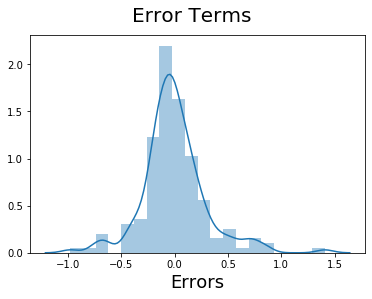

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms looks normally distributed

## Step 9:  Making Predictions Using the Final Model

In [102]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [103]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('price')
X_test = df_test

In [104]:
feature1

Index(['cylindernumber', 'enginesize', 'boreratio', 'compressionratio',
       'horsepower', 'gas', 'hardtop', 'rear', 'ohcv', 'rotor', 'idi', 'mfi',
       'spdi', 'mid', 'luxury'],
      dtype='object')

In [105]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_feature1 = X_test[feature1]

In [106]:
X_test_feature1.drop(['cylindernumber', 'enginesize', 'boreratio', 
        'gas', 'hardtop', 'rear', 'ohcv', 'rotor', 'idi', 'mfi',
       'spdi' ],axis=1,inplace=True)

In [107]:
X_test_feature1 = sm.add_constant(X_test_feature1)
X_test_feature1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 160 to 74
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             41 non-null     float64
 1   compressionratio  41 non-null     float64
 2   horsepower        41 non-null     float64
 3   mid               41 non-null     uint8  
 4   luxury            41 non-null     uint8  
dtypes: float64(3), uint8(2)
memory usage: 1.4 KB


## Step 10: Model Evaluation

In [108]:
y_pred = lm11.predict(X_test_feature1)

Text(0, 0.5, 'y_pred')

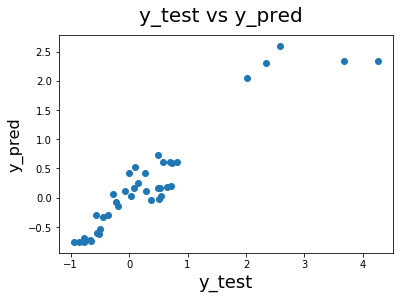

In [109]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [110]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8534748764895047

In [111]:
feature1_corr=feature1.drop(['cylindernumber', 'enginesize', 'boreratio', 
        'gas', 'hardtop', 'rear', 'ohcv', 'rotor', 'idi', 'mfi',
       'spdi' ])

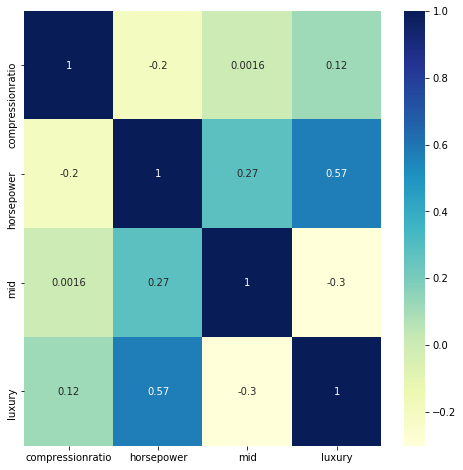

In [112]:
# Figure size
plt.figure(figsize=(8,8))

# Heatmap
sns.heatmap(CarPrice[feature1_corr].corr(), cmap="YlGnBu", annot=True)
plt.show()

Final model consist of 4 variables only and Geely Auto need to concentrate on above given variables, Luxury and Mid segment are good to enter and people more intereseted in more horse power.